Saving IMAGE_1663400737.webp to IMAGE_1663400737.webp


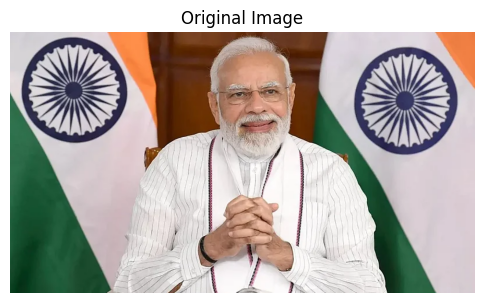

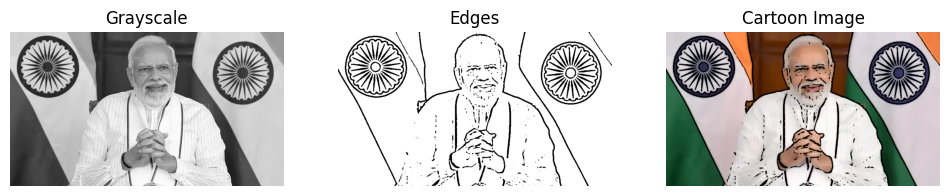

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
# Cartoonify an Image using OpenCV

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Step 1: Upload an image
uploaded = files.upload()

# Step 2: Read and display the uploaded image
for fn in uploaded.keys():
    image_path = fn

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')
plt.show()

# Step 3: Apply Cartoonifying Process

# 1. Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 2. Apply median blur
gray_blur = cv2.medianBlur(gray, 5)

# 3. Detect edges using adaptive thresholding
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 9, 9)

# 4. Apply bilateral filter to smooth colors
color = cv2.bilateralFilter(img, d=9, sigmaColor=250, sigmaSpace=250)

# 5. Combine edges and color image
cartoon = cv2.bitwise_and(color, color, mask=edges)

# Step 4: Display Results
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Grayscale")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Edges")
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Cartoon Image")
plt.imshow(cartoon)
plt.axis('off')

plt.show()

# Step 5: Save and download the cartoon image
cartoon_bgr = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2.imwrite("cartoonified.png", cartoon_bgr)
files.download("cartoonified.png")
